<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
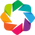

In [1]:
import pandas as pd
import numpy as np

import re
import holoviews as hv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
hv.extension('bokeh')

% matplotlib inline

In [2]:
users = pd.read_csv('myanimelist/users_filtered.csv')
animes = pd.read_csv('myanimelist/anime_filtered.csv')
user_animes = pd.read_csv('manipulated_data/UserAnimeRandom.csv')

In [3]:
# Adds age column
users['age'] = users['birth_date'].apply(lambda x: 2018 - int(x.split("-")[0]))
#trocar idade pelo dia que fez avaliacao
#!!!!!!!!!!!!!!!!!!

# Merges user_animes with users
merged = users.merge(user_animes, left_on='username', right_on='username', how='inner')
merged = merged.merge(animes, left_on='anime_id', right_on='anime_id', how='inner')

#Adds completion column
merged['my_completion'] = round((merged['my_watched_episodes']/merged['episodes']),2)

In [4]:
display(merged)

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,...,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,my_completion
0,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
1,ilikewhiterice,142519,13,355,55,104,75,106.93,Male,"Brentwood, New Hampshire",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
2,Sinnu,1321457,4,498,0,0,429,91.57,Male,France,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],0.00
3,anifantasy,4666359,3,154,16,19,34,59.66,Female,mysterious,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
4,GodsClown,251214,22,185,3,1,93,74.28,Male,"Santa Barbara, California",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
5,rnauser,1186697,11,342,12,5,70,75.73,Male,"Örebro, Sweden",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
6,AmazinFlyinBrick,5141645,24,449,269,7,571,129.51,Male,Georgia,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],0.00
7,KACI,118162,3,419,9,0,373,100.53,Male,"Ruse , Bulgaria",...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
8,GaryL,4884322,2,327,9,33,1,121.80,Male,Brazil,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00
9,Puali_huntess,175982,35,340,18,16,71,117.01,Female,Puerto Rico,...,NaN,NaN,[],"d-rights, Tokuma Shoten",Walt Disney Studios,Studio Ghibli,"Adventure, Drama, Fantasy, Romance","['""Sekai no Yakusoku (世界の約束; The Promise of th...",[],1.00


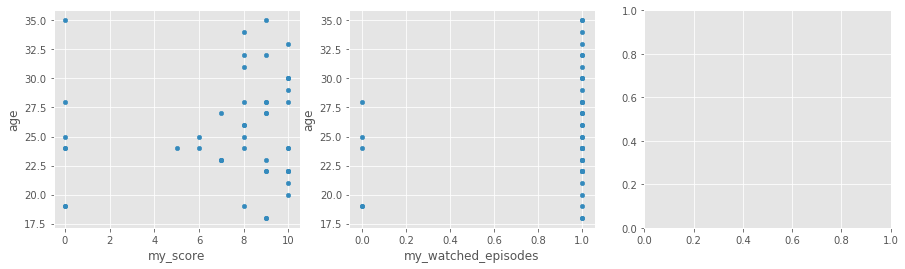

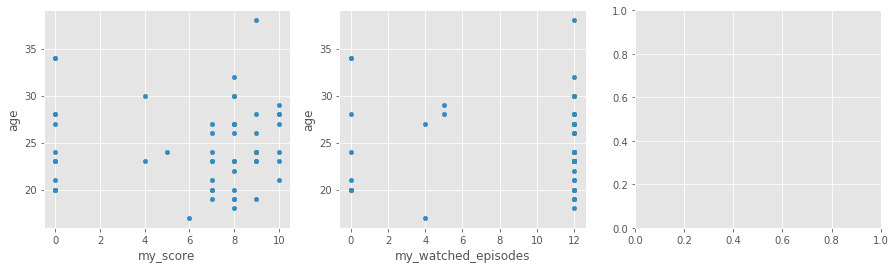

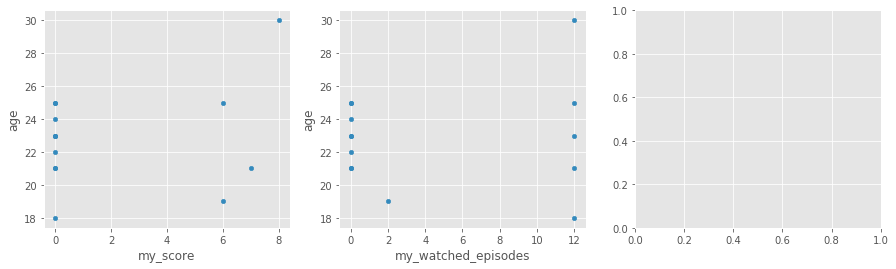

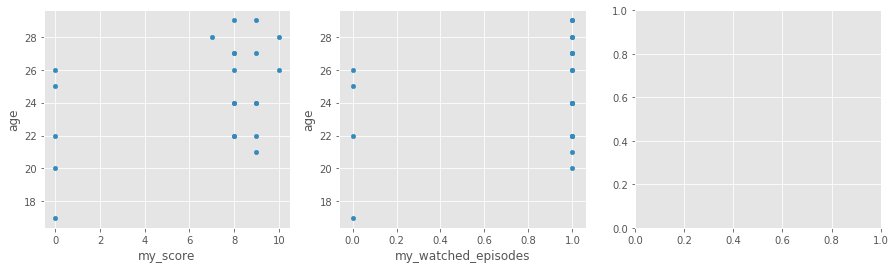

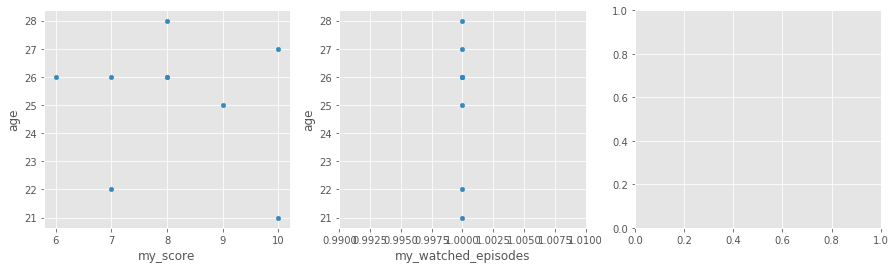

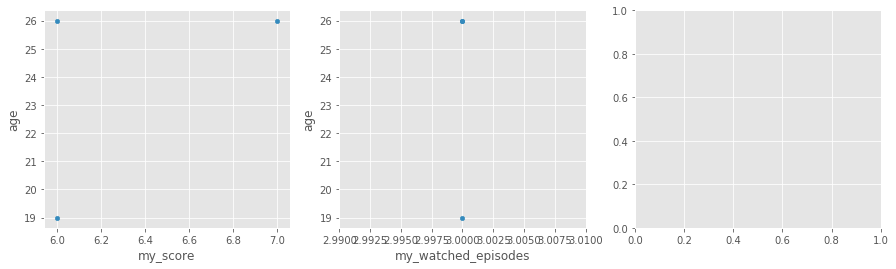

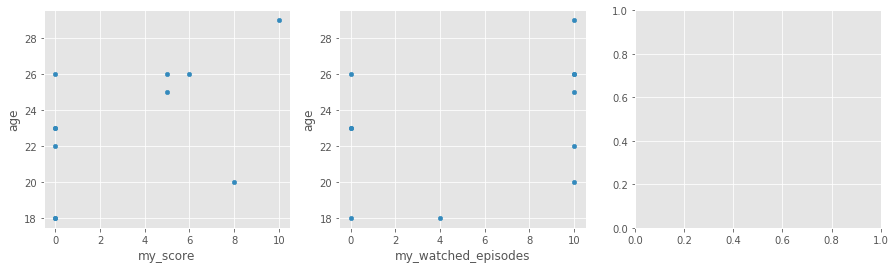

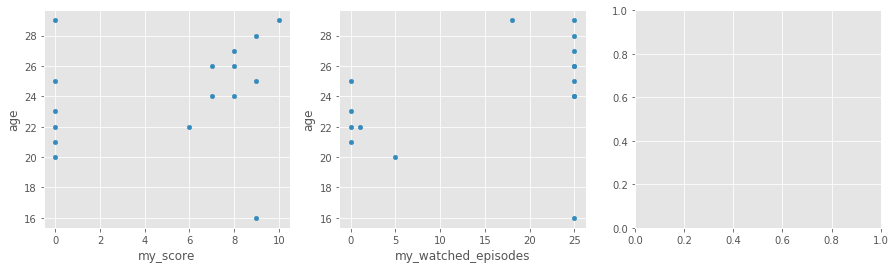

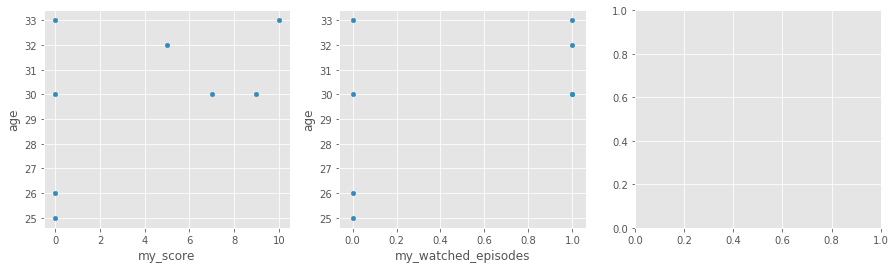

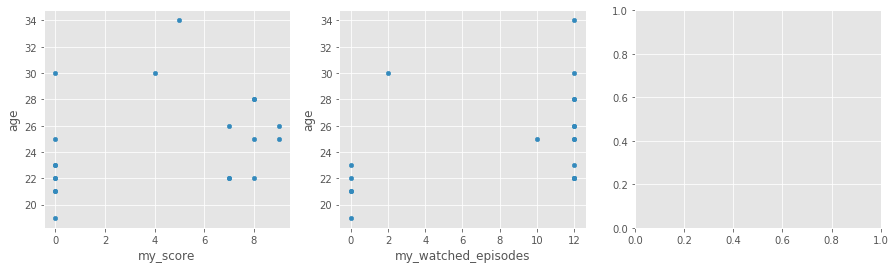

In [5]:
count = 0
for anime_id in merged.anime_id.unique():
    if (not np.isnan(anime_id) and count < 10):
        anime_relation = merged[merged.anime_id == anime_id]

        figs, axes = plt.subplots(1,3,figsize=(15,4))
        anime_relation[['my_score','age']].plot.scatter(x='my_score',y='age',ax=axes[0])
        anime_relation[['my_watched_episodes','age']].plot.scatter(x='my_watched_episodes',y='age',ax=axes[1])
#         anime_relation[['gender', 'my_watched_episodes']].plot.bar(x='gender',y='my_watched_episodes',ax=axes[2])
        count += 1

In [6]:
from bokeh.models import HoverTool

tp = """
     <div style="display: inline">
        <img src="@image_url" alt="@title" onerror="this.src='http://www.richardsalter.com/wp-content/uploads/2011/07/Cover-not-available.jpg'" width="100" height="100" style="float: left; border="4px";></img>
        <div style="float: right">
            <span style="font-size: 13px; float: left; font-weight: bold;">Title:&nbsp</span><span style="font-size: 13px; float: left">@title</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Episodes:&nbsp</span><span style="font-size: 13px; float: left">@episodes</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Status:&nbsp</span><span style="font-size: 13px; float: left">@status</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Premiered:&nbsp</span><span style="font-size: 13px; float: left">@premiered</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Studio:&nbsp</span><span style="font-size: 13px; float: left">@studio</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Genre:&nbsp</span><span style="font-size: 13px; float: left">@genre</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Rating:&nbsp</span><span style="font-size: 13px; float: left">@rating</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Media:&nbsp</span><span style="font-size: 13px; float: left">@type</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Source:&nbsp</span><span style="font-size: 13px; float: left">@source</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Rank:&nbsp</span><span style="font-size: 13px; float: left">@rank</span><br/>
            <span style="font-size: 13px; float: left; font-weight: bold;">Popularity:&nbsp</span><span style="font-size: 13px; float: left">@popularity</span><br/>
        </div>
    </div>
"""

hover = HoverTool(tooltips=tp)

In [7]:
ranked = animes.sort_values('rank')
ranked = ranked.dropna(subset=['rank'])
ranked = ranked.query('rank != 0')
ranked = ranked.head(20)
#display(ranked)

In [8]:
%%opts Bars [width=950, height=650, tools=[hover] xrotation=90] (color='#008080')

ranked.insert(0, column='relative_popularity', value=(1000 - ranked['popularity']))
topbars = hv.Bars(ranked, hv.Dimension('title'))
topbars = topbars.relabel(group='Top Ranked Animes')
display(topbars)

:Bars   [title]   (relative_popularity,anime_id,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme)

In [9]:
popular = animes.sort_values('popularity')
popular = popular.dropna(subset=['popularity'])
popular = popular.query('rank != 0')
popular = popular.head(20)
#display(popular)

In [10]:
%%opts Bars [width=950, height=650, tools=[hover] xrotation=90] (color='#B2B200')

popular.insert(0, column='relative_rank', value=(2900-popular['rank']))
popbars = hv.Bars(popular, hv.Dimension('title'))
popbars = popbars.relabel(group='Most Popular Animes')
display(popbars)

:Bars   [title]   (relative_rank,anime_id,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme)

In [11]:
merged.columns.values

array(['username', 'user_id', 'user_watching', 'user_completed',
       'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Unnamed: 0',
       'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'my_completion'], dtype=object)

In [12]:
filanimes = animes.dropna(subset=['genre'])

def makeGenresSet():
    genres = set()
    for i in filanimes['genre'].unique():
        pattern = re.compile("([A-Za-z]*),")
        match = pattern.match(i)
        if match:
            genres.add(match[1])
    return genres
        
genres = list(makeGenresSet())
from bokeh.palettes import *

In [13]:
%%opts Bars [width=400, height=500, tools=['hover'], xrotation=45] (color='#ff77ff')

temp = filanimes.copy()

filanimes['premiered'] = filanimes['premiered'].apply(lambda x: str(x).split(' ', 1)[0])
filanimes = filanimes.query("premiered != 'nan'")

meltedanimes = pd.melt(filanimes, ['premiered'], ['genre'])
meltedanimes['value'] = meltedanimes['value'].apply(lambda x: x.split(", "))
meltedanimes = meltedanimes.value.apply(pd.Series).merge(meltedanimes, left_index=True, right_index=True).drop(["value","variable"], axis=1).melt(id_vars = ['premiered'], value_name="genre").drop("variable", axis=1).dropna()
meltedanimes = meltedanimes.groupby(['premiered','genre']).size().reset_index().rename(columns={0:'Quantity'})

quants = meltedanimes.groupby('genre').Quantity.sum().to_dict()

def divBySeason(x):
    a = x['Quantity']/quants[x['genre']]
    return a

meltedanimes['Quantity'] = meltedanimes.apply(lambda x: divBySeason(x), axis=1)

t = hv.Bars(data = meltedanimes, kdims=['genre', 'premiered'], vdims=['Quantity'])
t = t.groupby('genre')
t.select(genres)

/Users/Claudio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


:HoloMap   [genre]
   :Bars   [premiered]   (Quantity)

In [14]:
merged['location']

0                                         Detroit,Michigan
1                                 Brentwood, New Hampshire
2                                                   France
3                                               mysterious
4                                Santa Barbara, California
5                                           Örebro, Sweden
6                                                  Georgia
7                                          Ruse , Bulgaria
8                                                   Brazil
9                                              Puerto Rico
10                                                Michigan
11                       Europe - Poland - Olsztyn/Lipniki
12                                    Brisbane, Australia 
13                                     Manila, Philippines
14                                           Veneto, Italy
15                                            Glenside, PA
16                                                 Germa

In [15]:
import json

with open('countries.json') as f:
    data = json.load(f)
names = []
for i in data:
    names.append(i['name'])
dictnames = dict();
for i in names:
    dictnames[i['common']] = [i['common']]
    dictnames[i['common']].append(i['official'])
    for n in [i['native']]:
        for j in n:
            dictnames[i['common']].append(n[j]['common'])
            dictnames[i['common']].append(n[j]['official'])
alternativeus = ['US', 'USA', 'U.S.', 'U.S', 'U.S.A.', 'America']
for i in alternativeus:
    dictnames['United States'].append(i)
dictnames['United Kingdom'].append('UK')
dictnames['United Kingdom'].append('England')
dictnames['Canada'].append('Montreal')
dictnames['Canada'].append('Montréal')
dictnames

{'Aruba': ['Aruba', 'Aruba', 'Aruba', 'Aruba', 'Aruba', 'Aruba'],
 'Afghanistan': ['Afghanistan',
  'Islamic Republic of Afghanistan',
  'افغانستان',
  'جمهوری اسلامی افغانستان',
  'افغانستان',
  'د افغانستان اسلامي جمهوریت',
  'Owganystan',
  'Owganystan Yslam Respublikasy'],
 'Angola': ['Angola', 'Republic of Angola', 'Angola', 'República de Angola'],
 'Anguilla': ['Anguilla', 'Anguilla', 'Anguilla', 'Anguilla'],
 'Åland Islands': ['Åland Islands',
  'Åland Islands',
  'Åland',
  'Landskapet Åland'],
 'Albania': ['Albania',
  'Republic of Albania',
  'Shqipëria',
  'Republika e Shqipërisë'],
 'Andorra': ['Andorra',
  'Principality of Andorra',
  'Andorra',
  "Principat d'Andorra"],
 'United Arab Emirates': ['United Arab Emirates',
  'United Arab Emirates',
  'دولة الإمارات العربية المتحدة',
  'الإمارات العربية المتحدة'],
 'Argentina': ['Argentina',
  'Argentine Republic',
  'Argentina',
  'Argentine Republic',
  'Argentina',
  'República Argentina'],
 'Armenia': ['Armenia',
  'Republ

In [16]:
states = pd.read_csv('states.csv')
states = states.to_dict("records")
for i in states:
    dictnames['United States'].append(i['State'])
    dictnames['United States'].append(i['Abbreviation'])
dictnames

{'Aruba': ['Aruba', 'Aruba', 'Aruba', 'Aruba', 'Aruba', 'Aruba'],
 'Afghanistan': ['Afghanistan',
  'Islamic Republic of Afghanistan',
  'افغانستان',
  'جمهوری اسلامی افغانستان',
  'افغانستان',
  'د افغانستان اسلامي جمهوریت',
  'Owganystan',
  'Owganystan Yslam Respublikasy'],
 'Angola': ['Angola', 'Republic of Angola', 'Angola', 'República de Angola'],
 'Anguilla': ['Anguilla', 'Anguilla', 'Anguilla', 'Anguilla'],
 'Åland Islands': ['Åland Islands',
  'Åland Islands',
  'Åland',
  'Landskapet Åland'],
 'Albania': ['Albania',
  'Republic of Albania',
  'Shqipëria',
  'Republika e Shqipërisë'],
 'Andorra': ['Andorra',
  'Principality of Andorra',
  'Andorra',
  "Principat d'Andorra"],
 'United Arab Emirates': ['United Arab Emirates',
  'United Arab Emirates',
  'دولة الإمارات العربية المتحدة',
  'الإمارات العربية المتحدة'],
 'Argentina': ['Argentina',
  'Argentine Republic',
  'Argentina',
  'Argentine Republic',
  'Argentina',
  'República Argentina'],
 'Armenia': ['Armenia',
  'Republ

In [17]:
def findCountry(x):
    for i in dictnames:
        for j in dictnames[i]:
            if j in x:
                return i
    return "no data"

merged['country'] = merged['location'].apply(lambda x: findCountry(x))
merged[['location', 'country']]

,location,country
0,"Detroit,Michigan",United States
1,"Brentwood, New Hampshire",United States
2,France,France
3,mysterious,no data
4,"Santa Barbara, California",United States
5,"Örebro, Sweden",Sweden
6,Georgia,Georgia
7,"Ruse , Bulgaria",Bulgaria
8,Brazil,Brazil
9,Puerto Rico,Puerto Rico


In [18]:
def topAnime(x):
    spec = merged.query("country == '"+x+"'")
    return spec.title.mode()[0]

bestmap = pd.DataFrame(data={'country':merged.country.unique()})
bestmap['top'] = bestmap['country'].apply(lambda x: topAnime(x))
bestmap

,country,top
0,United States,Tengen Toppa Gurren Lagann
1,France,Summer Wars
2,no data,Steins;Gate
3,Sweden,School Days
4,Georgia,Ao no Exorcist
5,Bulgaria,Bleach Movie 3: Fade to Black - Kimi no Na wo ...
6,Brazil,Kokoro Connect
7,Puerto Rico,Akagami no Shirayuki-hime
8,Poland,Elfen Lied
9,Australia,Black Lagoon


In [19]:
merged.columns.values

array(['username', 'user_id', 'user_watching', 'user_completed',
       'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Unnamed: 0',
       'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'my_completion', 'country'],
      dtype=object)

In [20]:
temp = temp.query("premiered != 'nan'")
temp = pd.melt(temp, ['premiered'], ['genre'])

In [38]:
%%opts Curve [width=900, height=300, tools=['hover'], xrotation=45] (color='red')

timelapse = temp.copy()

timelapse = timelapse.dropna(subset = ['premiered'])
timelapse['premiered'] = timelapse['premiered'].apply(lambda x: str(x).split(' ', 1)[1])
timelapse['value'] = timelapse['value'].apply(lambda x: x.split(", "))
timelapse = timelapse.value.apply(pd.Series).merge(timelapse, left_index=True, right_index=True).drop(["value","variable"], axis=1).melt(id_vars = ['premiered'], value_name="genre").drop("variable", axis=1).dropna()
timelapse = timelapse.groupby(['premiered', 'genre']).size().reset_index().rename(columns={0:'Quantity'})
timelapse = timelapse.query("premiered != '2019'")

timelapse = hv.Curve(data = timelapse, kdims=['genre', 'premiered'], vdims=['Quantity'])
timelapse = timelapse.groupby('genre')
timelapse.select(genres)

:HoloMap   [genre]
   :Curve   [premiered]   (Quantity)